In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection \
import train_test_split
import seaborn as sns

Question#1.1 load the data into Pandas dataframe and add a column ”color”. For each class 0, this should contain ”green” and for each class 1 it should contain ”red”

In [2]:
data=pd.read_csv("data_banknote_authentication.csv")
color=[]
for i in range(len(data)):
    if data["class"][i]==0:
        color.append("green")
    else:
        color.append("red")
data["color"]=color
print(data)


      variance  skewness  curtosis  entropy  class  color
0      3.62160   8.66610   -2.8073 -0.44699      0  green
1      4.54590   8.16740   -2.4586 -1.46210      0  green
2      3.86600  -2.63830    1.9242  0.10645      0  green
3      3.45660   9.52280   -4.0112 -3.59440      0  green
4      0.32924  -4.45520    4.5718 -0.98880      0  green
...        ...       ...       ...      ...    ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1    red
1368  -1.38870  -4.87730    6.4774  0.34179      1    red
1369  -3.75030 -13.45860   17.5932 -2.77710      1    red
1370  -3.56370  -8.38270   12.3930 -1.28230      1    red
1371  -2.54190  -0.65804    2.6842  1.19520      1    red

[1372 rows x 6 columns]


Question#1.2 for each class and for each feature f1, f2, f3, f4, compute its mean μ() and standard deviation σ(). Round the results to 2 decimal places and summarize them in a table as shown below:

In [3]:
#f1
f1_mu=[]
f1_mu.append(round(data.loc[(data["class"]==0),:]["variance"].mean(),2))
f1_mu.append(round(data.loc[(data["class"]==1),:]["variance"].mean(),2))
f1_mu.append(round(data["variance"].mean(),2))
f1_std=[]
f1_std.append(round(data.loc[(data["class"]==0),:]["variance"].std(),2))
f1_std.append(round(data.loc[(data["class"]==1),:]["variance"].std(),2))
f1_std.append(round(data["variance"].std(),2))

#f2
f2_mu=[]
f2_mu.append(round(data.loc[(data["class"]==0),:]["skewness"].mean(),2))
f2_mu.append(round(data.loc[(data["class"]==1),:]["skewness"].mean(),2))
f2_mu.append(round(data["skewness"].mean(),2))
f2_std=[]
f2_std.append(round(data.loc[(data["class"]==0),:]["skewness"].std(),2))
f2_std.append(round(data.loc[(data["class"]==1),:]["skewness"].std(),2))
f2_std.append(round(data["skewness"].std(),2))

#f3
f3_mu=[]
f3_mu.append(round(data.loc[(data["class"]==0),:]["curtosis"].mean(),2))
f3_mu.append(round(data.loc[(data["class"]==1),:]["curtosis"].mean(),2))
f3_mu.append(round(data["curtosis"].mean(),2))
f3_std=[]
f3_std.append(round(data.loc[(data["class"]==0),:]["curtosis"].std(),2))
f3_std.append(round(data.loc[(data["class"]==1),:]["curtosis"].std(),2))
f3_std.append(round(data["curtosis"].std(),2))

#f4
f4_mu=[]
f4_mu.append(round(data.loc[(data["class"]==0),:]["entropy"].mean(),2))
f4_mu.append(round(data.loc[(data["class"]==1),:]["entropy"].mean(),2))
f4_mu.append(round(data["entropy"].mean(),2))
f4_std=[]
f4_std.append(round(data.loc[(data["class"]==0),:]["entropy"].std(),2))
f4_std.append(round(data.loc[(data["class"]==1),:]["entropy"].std(),2))
f4_std.append(round(data["entropy"].std(),2))

Q1_d={"Feature":pd.Series(["0","1","all"]),
      "μ(f1)":pd.Series(f1_mu),
      "σ(f1)":pd.Series(f1_std),
      "μ(f2)":pd.Series(f2_mu),
      "σ(f2)":pd.Series(f2_std),
      "μ(f3)":pd.Series(f3_mu),
      "σ(f3)":pd.Series(f3_std),
      "μ(f4)":pd.Series(f4_mu),
      "σ(f4)":pd.Series(f4_std)}
Q1_df=pd.DataFrame(Q1_d)
print(Q1_df)

  Feature  μ(f1)  σ(f1)  μ(f2)  σ(f2)  μ(f3)  σ(f3)  μ(f4)  σ(f4)
0       0   2.28   2.02   4.26   5.14   0.80   3.24  -1.15   2.13
1       1  -1.87   1.88  -0.99   5.40   2.15   5.26  -1.25   2.07
2     all   0.43   2.84   1.92   5.87   1.40   4.31  -1.19   2.10


Question#1.3 examine your table. Are there any obvious patterns in the distribution of banknotes in each class

The variance and skewness of real banknotes will be better than counterfeit banknotes

Question#2.1 split your dataset X into training Xtrain and Xtesting parts (50/50 split). Using ”pairplot” from seaborn package, plot pairwise relationships in Xtrain separately for class 0 and class 1. Save your results into 2 pdf files ”good bills.pdf” and ”fake bills.pdf”

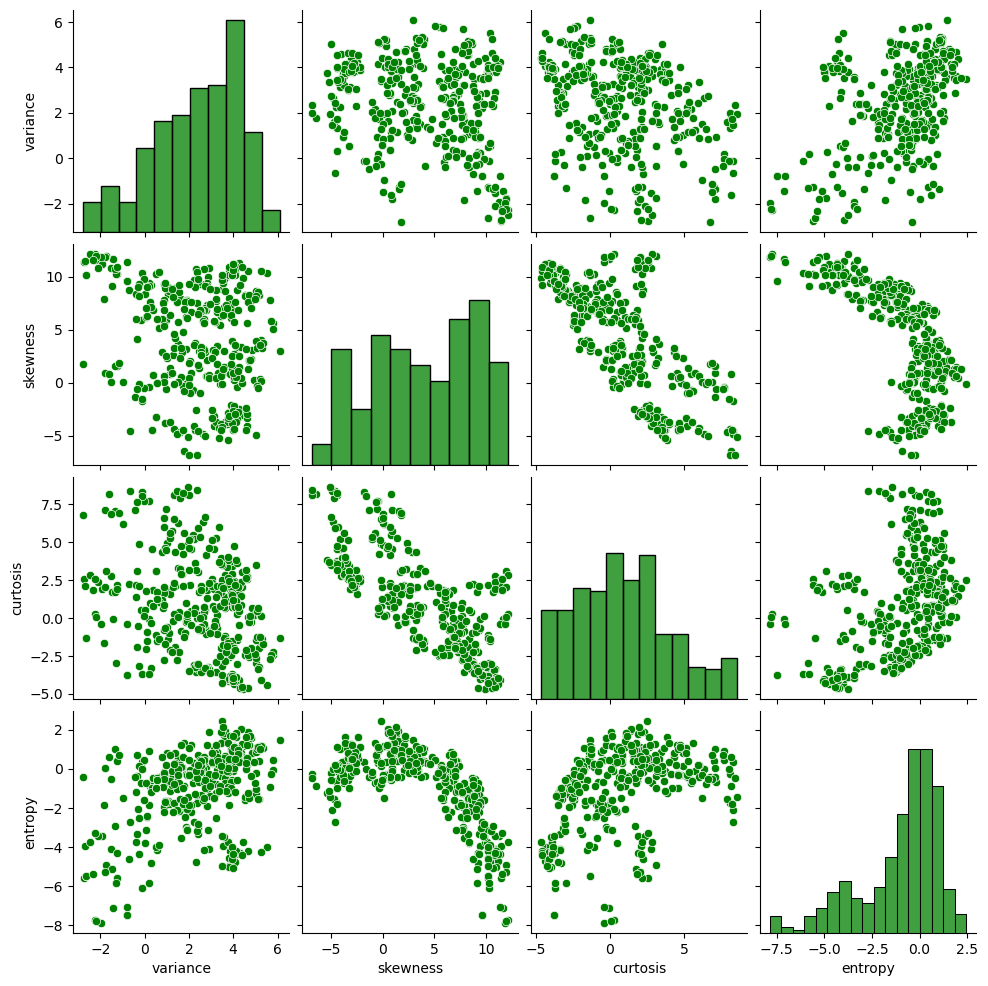

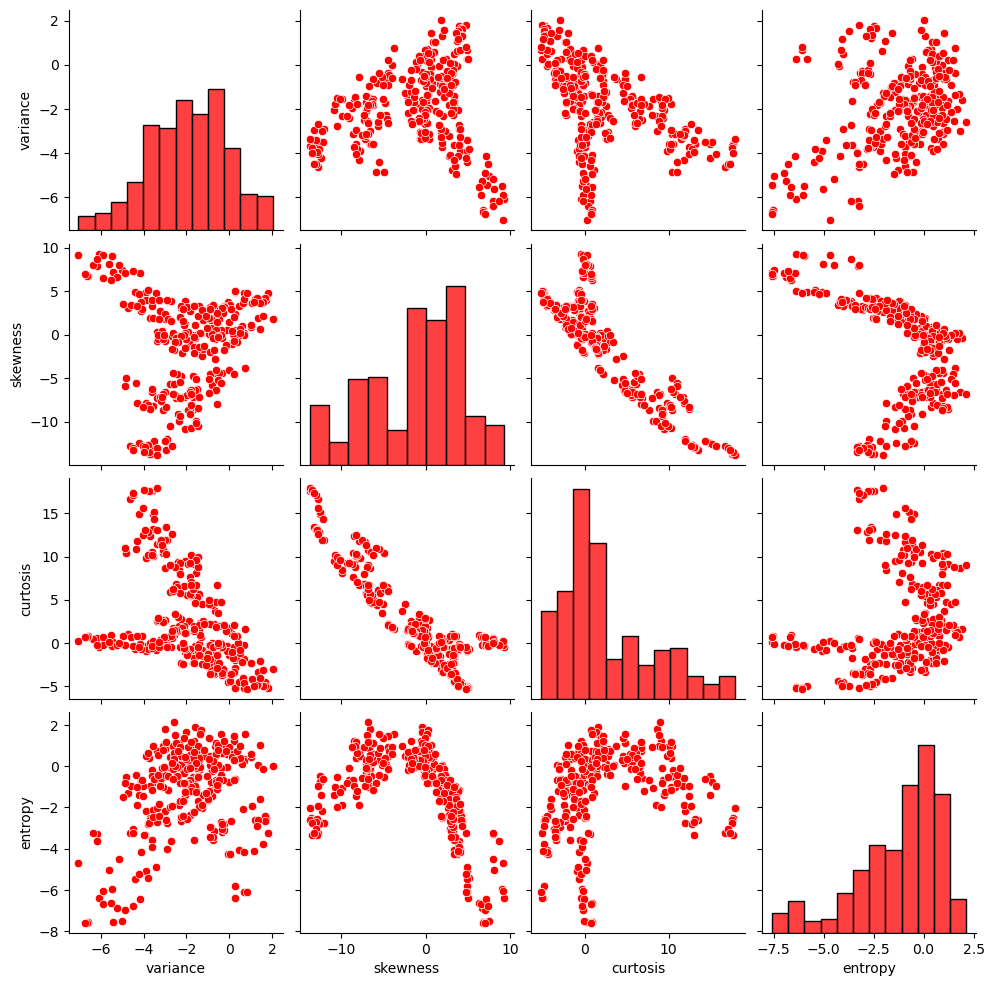

In [4]:
from xml.sax.handler import feature_external_ges


X = data[["variance","skewness","curtosis","entropy","class"]]
y = data["class"]
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.5)
X_train_0=X_train.loc[(X_train["class"]==0),:]
X_train_1=X_train.loc[(X_train["class"]==1),:]


features=["variance","skewness","curtosis","entropy"]
pair_plot_bed = sns.pairplot(X_train_0[features],diag_kws=dict(color='green'),plot_kws=dict(color='green'))
plt.show()
pair_plot_good = sns.pairplot(X_train_1[features],diag_kws=dict(color='red'),plot_kws=dict(color='red'))
plt.show()




Question#2. visually examine your results. Come up with three simple comparisons that you think may be sufficient to detect a fake bill. For example, your classifier may look like this:


In [5]:

X_test.loc[len(data.index)]=[8,2,9,8,0]


X_test["variance_label"]=X_test["variance"].apply(lambda x: 1 if x<0 else 0)
X_test["skewness_label"]=X_test["skewness"].apply(lambda x: 1 if x<5 else 0)
X_test["curtosis_label"]=X_test["curtosis"].apply(lambda x: 1 if x<2.3 else 0)
X_test["entropy_label"]=X_test["entropy"].apply(lambda x: 1 if x>X_test["entropy"].median() else 0)

#data.to_csv("Q2.csv")


X_test=X_test.reset_index(drop=True)

Q2_lable=[]
for i in range(len(X_test)):
    if (X_test["variance_label"][i]+X_test["skewness_label"][i]+X_test["curtosis_label"][i])>=2:
        Q2_lable.append(1)
    else:
        Q2_lable.append(0)
X_test["Q2_label"]=Q2_lable
print(X_test)


     variance  skewness  curtosis   entropy  class  variance_label  \
0      4.9264   5.49600  -2.47740 -0.506480      0               0   
1     -0.2780   8.18810  -3.13380 -2.527600      0               1   
2      2.1265   6.87830   0.44784 -2.222400      0               0   
3      1.3638  -4.77590   8.41820 -1.883600      0               0   
4      5.0691   0.21313   0.20278  1.209500      0               0   
..        ...       ...       ...       ...    ...             ...   
682    2.1616  -6.88040   8.15170 -0.081048      0               0   
683    5.7456  10.18080  -4.78570 -4.336600      0               0   
684    3.5288   0.71596   1.95070  1.937500      0               0   
685   -2.5919  -1.05530   3.89490  0.777570      1               1   
686    8.0000   2.00000   9.00000  8.000000      0               0   

     skewness_label  curtosis_label  entropy_label  Q2_label  
0                 0               1              1         0  
1                 0              

Question#2.3 apply your simple classifier to Xtest and compute predicted class labels


Question#2.4 compare your predicted class labels with true labels in Xtest, compute the following:

In [6]:
TP_Q2=X_test.loc[(X_test["Q2_label"]==0)&(X_test["class"]==0),:]["class"].count()
FP_Q2=X_test.loc[(X_test["Q2_label"]==0)&(X_test["class"]==1),:]["class"].count()
TN_Q2=X_test.loc[(X_test["Q2_label"]==1)&(X_test["class"]==1),:]["class"].count()
FN_Q2=X_test.loc[(X_test["Q2_label"]==1)&(X_test["class"]==0),:]["class"].count()
TPR_Q2=TP_Q2/(TP_Q2+FN_Q2)
TNR_Q2=TN_Q2/(TN_Q2+FP_Q2)
ACC_Q2=(TP_Q2+TN_Q2)/len(X_test)

Q2_d={"Classifier":pd.Series(["predict"]),
      "TP":pd.Series([TP_Q2]),
      "FP":pd.Series([FP_Q2]),
      "TN":pd.Series([TN_Q2]),
      "FN":pd.Series([FN_Q2]),
      "ACC":pd.Series([ACC_Q2]),
      "TPR":pd.Series([TPR_Q2]),
      "TNR":pd.Series([TNR_Q2])}
Q2_df=pd.DataFrame(Q2_d)
print(Q2_df)


  Classifier   TP  FP   TN   FN       ACC       TPR       TNR
0    predict  269   1  307  110  0.838428  0.709763  0.996753


Question#2.5 summarize your findings in the table as shown below:

This model I customized has a high probability of finding genuine banknotes

Question#2.6 6. does you simple classifier gives you higher accuracy on iden- tifying ”fake” bills or ”real” bills” Is your accuracy better than 50% (”coin” flipping)?

From my anwswer, My model has higher accuracy in identifying fake banknotes, while the probability of identifying real banknotes is relatively low.But both are over 50, so is higher then "coin" flipping

Question#3.1 take k = 3, 5, 7, 9, 11. For each k, generate Xtrain and Xtest using 50/50 split as before. Train your k-NN classifier on Xtrain and compute its accuracy for Xtest

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_Q3=pd.read_csv("data_banknote_authentication.csv")

def Q3_KNN(Q3_data,n):
    Q3_X=data_Q3[["variance","skewness","curtosis","entropy"]]
    Q3_y=data_Q3["class"]
    Q3_X_train, Q3_X_test, Q3_y_train, Q3_y_test = train_test_split(Q3_X, Q3_y, test_size = 0.5)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(Q3_X_train, Q3_y_train)
    return accuracy_score(Q3_y_test, knn.predict(Q3_X_test))
#k=3
K_3=Q3_KNN(data_Q3,3)
K_5=Q3_KNN(data_Q3,5)
K_7=Q3_KNN(data_Q3,7)
K_9=Q3_KNN(data_Q3,9)
K_11=Q3_KNN(data_Q3,11)
print("K=3:",K_3)
print("K=5:",K_5)
print("K=7:",K_7)
print("K=9:",K_9)
print("K=3:",K_11)


K=3: 1.0
K=5: 1.0
K=7: 1.0
K=9: 0.9970845481049563
K=3: 1.0


Question#3.2 plot a graph showing the accuracy. On x axis you plot k and on y-axis you plot accuracy. What is the optimal value k∗ of k?

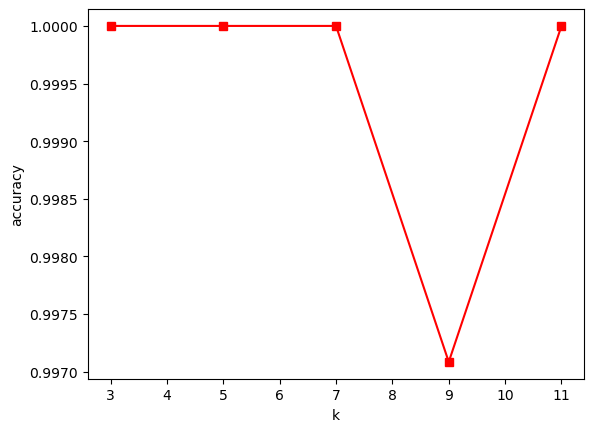

In [8]:
Q3_xlab = [3,5,7,9,11]
plt.plot(Q3_xlab,[K_3,K_5,K_7,K_9,K_11],'s-',color = 'r',label="ATT-RLSTM")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.show()


Question#3.3 use the optimal value k∗ to compute performance measures and summarize them in the table

In [9]:
from sklearn.metrics import confusion_matrix
Q3_X=data_Q3[["variance","skewness","curtosis","entropy"]]
Q3_y=data_Q3["class"]
Q3_X_train, Q3_X_test, Q3_y_train, Q3_y_test = train_test_split(Q3_X, Q3_y, test_size = 0.5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Q3_X_train, Q3_y_train)

Q3_acc=accuracy_score(Q3_y_test, knn.predict(Q3_X_test))
Q3_TN, Q3_FP, Q3_FN, Q3_TP = confusion_matrix(Q3_y_test, knn.predict(Q3_X_test)).ravel()
Q3_TPR=Q3_TP/(Q3_TP+Q3_FN)
Q3_TNR=Q3_TN/(Q3_TN+Q3_FP)


Q3_d={"Classifier":pd.Series(["predict"]),
      "TP":pd.Series([Q3_TP]),
      "FP":pd.Series([Q3_FP]),
      "TN":pd.Series([Q3_TN]),
      "FN":pd.Series([Q3_FN]),
      "ACC":pd.Series([Q3_acc]),
      "TPR":pd.Series([Q3_TPR]),
      "TNR":pd.Series([Q3_TNR])}
Q3_df=pd.DataFrame(Q3_d)
print(Q3_df)

  Classifier   TP  FP   TN  FN       ACC       TPR  TNR
0    predict  309   0  376   1  0.998542  0.996774  1.0


Question#3.4 is your k-NN classifier better than your simple classifier for any of the measures from the previous table?

The correct rate of the K_NN algorithm is definitely higher than that of the simple classifier

Question#3.5 consider a bill x that contains the last 4 digits of your BUID as feature values. What is the class label predicted for this

In [10]:
data1 = {'variance':[8],
       'skewness':[2],
       'curtosis':[9],
       'entropy':[8]}
df=pd.DataFrame(data1)
print(type(df))
print(knn.predict(df))
print(df.columns.values)

<class 'pandas.core.frame.DataFrame'>
[0]
['variance' 'skewness' 'curtosis' 'entropy']


In the assembled model, I put my BUID information on the last line of the test set. And you get a prediction of 0. And for KNN part I use the last traing data to pridect my BUID.the answer is same. I also got 0.